<a href="https://colab.research.google.com/github/dmousa75/stqd6014-Data-Science/blob/main/exercise_sentiment_analysis_amazon_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro

##Sentiment Analysis in Python


In this notbookwe will be doing some sentiment analysis in python by using two different techniques:
  1. VADER(VAlence Aware Dictionary and sEntiment Reasoner)- Bags of words approach
  2. Roberta Pretrained Model from
  3. Huggingface Pipeline

##Install Packages & Read in Data and NLTK Basics

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
#Read in data
try:
    df = pd.read_csv('/content/sample_data/amazon reviews.csv')
    print(df.shape)
except FileNotFoundError:
    print(f"File not found at: {file_path}")
    print("Please make sure the file exists and the path is correct.")
#df = pd.read_csv('content/sample_data/amazon reviews.csv')
print(df.shape)
#df = df.head(500)
#print(df.shape)

(27720, 10)
(27720, 10)


In [18]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
#check in variable 'Text' at row 0
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [20]:
#filter to only 500 rows only from top
df = df.head(500)
print(df.shape)

(500, 10)


In [21]:
#check after the filter
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##Quick EDA

In [22]:
#numbers of score occurs
df['Score'].value_counts().sort_index()

,count
Score,
1,36
2,18
3,37
4,70
5,339


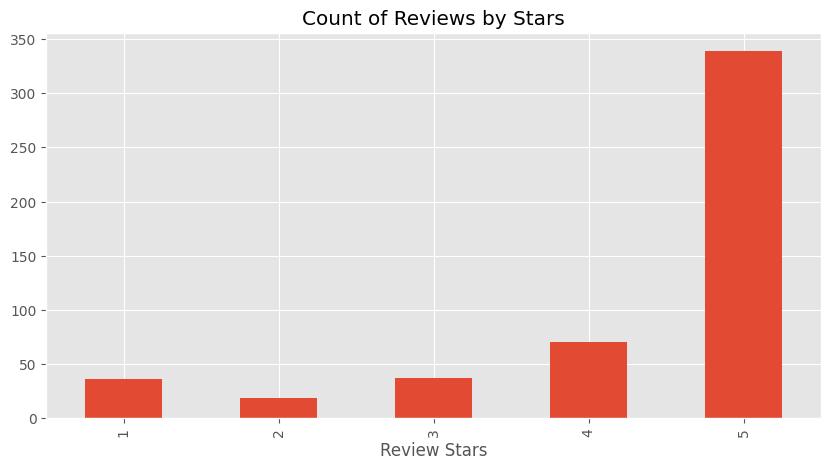

In [23]:
#Show in graph for easy understanding
ax = df['Score'].value_counts().sort_index() \
 .plot(kind='bar', #type of graph
       title='Count of Reviews by Stars',
       figsize=(10, 5))#width=10,height=5
ax.set_xlabel('Review Stars')#set x-axis label
plt.show()

##Basic NLTK

In [24]:
#create object to test a value as 'example' and show at row 50 only from variable 'Text'
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [25]:
#what NLTK can do, split the to the pieces word by word
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [26]:
#get the first 10 words from above, named object = token
token = nltk.word_tokenize(example)
token[: 10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [27]:
#run the pos_tag(part of speech tagging)
nltk.download('averaged_perceptron_tagger_eng')
nltk.pos_tag(token)#check the nltk speech tagging

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [28]:
tagged = nltk.pos_tag(token)#named as 'tagged'
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [29]:
#group the tagged using chunk for better reading for machine learning
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()#pretty print

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


##Step 2: VADER Sentiment Scoring

###We will use NLTK's SentimentIntensityAnalyzer to get neg/neu/pos scores of the text.


*   This uses a'bag of words' approach:
    1. Stop words are removed(and, the etc no neg/pos feeling)
    2. each words is scored and combine to a total scores.



In [30]:
#Check the sentiments
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm.notebook as tqdm # progree loop, check tqdm

sia = SentimentIntensityAnalyzer()#create objek for SIA

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
#test the SentimentintensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I am so happy')#sia.polarity_scores is the 'method'/function
#compound = is avg of neg to pos
#shows positive statement

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [32]:
#try another example
sia.polarity_scores('This is the worst thing ever')
#shows negative statement

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [33]:
#try on the objeck 'example' before
sia.polarity_scores(example)
#shows almost neg statement, look at compound

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [34]:
#Run the polarity scores on the entire dataset
res = {}#dictionary to store the results
for i, row in tqdm.tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)



  0%|          | 0/500 [00:00<?, ?it/s]

In [35]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [36]:
#df['Id'] = df['Id'].astype(str)

In [37]:
#if 'Id' in vaders['Id'].values:
    # Handle the Id values, such as replacing them or filtering them out
    #vaders['Id'] = vaders['Id'].str.replace('Id', '0')

#vaders['Id'] = pd.to_numeric(vaders['Id'], errors='coerce').fillna(0).astype(int)

In [38]:
#check the result, make in pandas
vaders = pd.DataFrame(res).T # 'T' for flip everything horizontally
vaders
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders
# Merge the DataFrames on 'Id'
vaders = vaders.merge(df, how='left', on='Id')  # ensure merging on 'Id'
vaders
# Reorder columns after the merge, ensuring all columns exist
vaders = vaders[['Id', 'Score', 'neg', 'neu', 'pos', 'compound'] + [col for col in vaders.columns if col not in ['Id', 'Score', 'neg', 'neu', 'pos', 'compound']]]

In [39]:
#Now we have sentiments and metadata
vaders.head()

,Id,Score,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
0,1,5,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [40]:
vaders

,Id,Score,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
0,1,5,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,5,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,4,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,4,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


##Plot VADER result

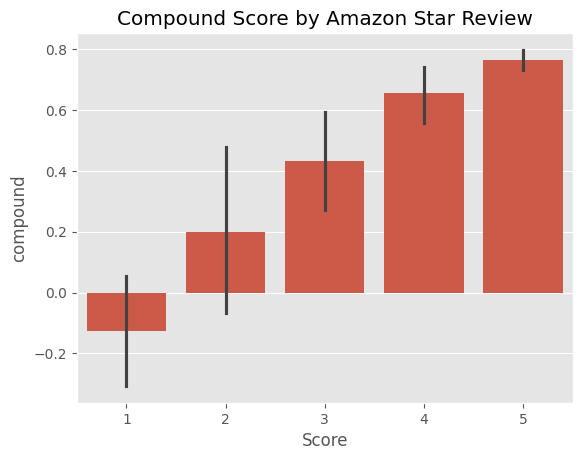

In [41]:
#Plot using seaborn
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

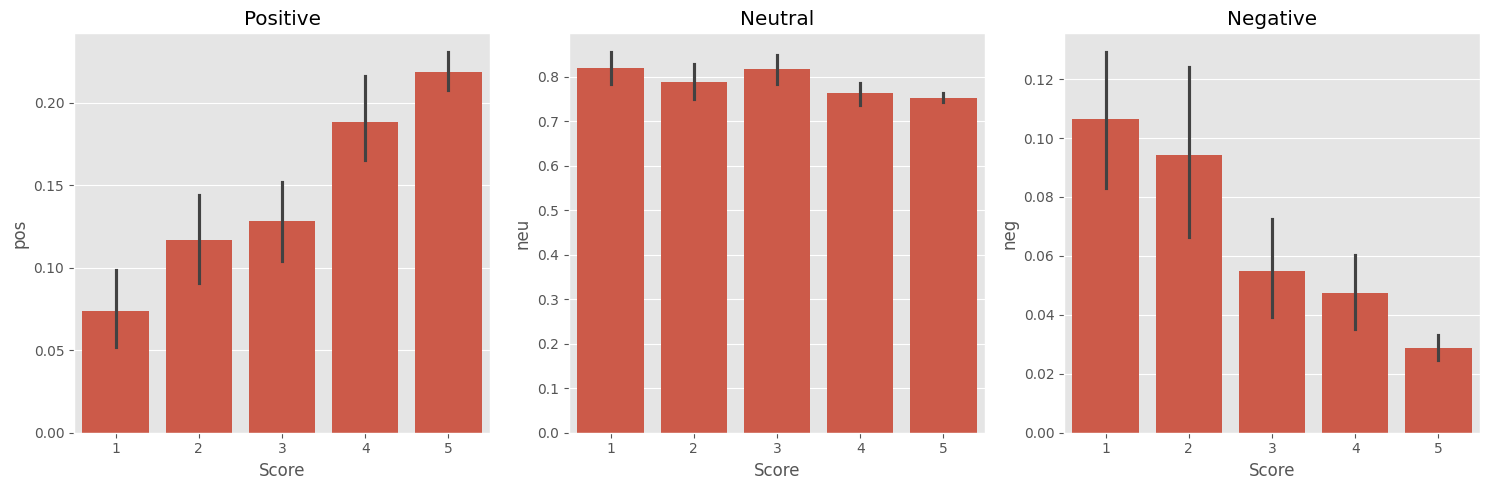

In [42]:
#Plot all results pos,neu,neg side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])#axs=location graph
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

##Step 3: Roberta Pretrained Model


*   Use a model trained ofa large corpus of data
*   Transformer model accounts for the words but also the context related to other words.





In [43]:
!pip install transformers

In [44]:
!pip install tokenizers

In [45]:
!pip install datasets#if we want to use the dataset inside

ERROR: Invalid requirement: 'datasets#if': Expected end or semicolon (after name and no valid version specifier)
    datasets#if
            ^


In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification#to check the sentiments
from scipy.special import softmax# for output's sentiments

In [47]:
#to run on the twitter labels & comments
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [48]:
#so we can use the MODEL and tokenizer can use on words


In [49]:
#VADER results on example
print(example)
sia.polarity_scores(example)#in VADER

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [50]:
#Run for Roberta Model
#encoding the text
encoded_text = tokenizer(example, return_tensors='pt')#pt=pipe tortion
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
#scores #neg,neu,pos
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573706}


In [51]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')#pt=pipe tortion
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [52]:
#Run on all dataset
import tqdm#make sure tqdm run properly without notebook
res = {}
for i, row in tqdm.tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')

 17%|█▋        | 83/500 [00:39<02:00,  3.46it/s]

Broke for id 83


 38%|███▊      | 188/500 [01:20<01:03,  4.93it/s]

Broke for id 187


100%|██████████| 500/500 [03:47<00:00,  2.20it/s]


In [53]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, how='left', on='Id')

In [54]:
#Check after the merger for 2 of its, can see 4 of its, neg,neu,pos&roberta_neg,roberta_neu&roberta_pos
result_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##Step 3.Combine and Compare

In [55]:
result_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

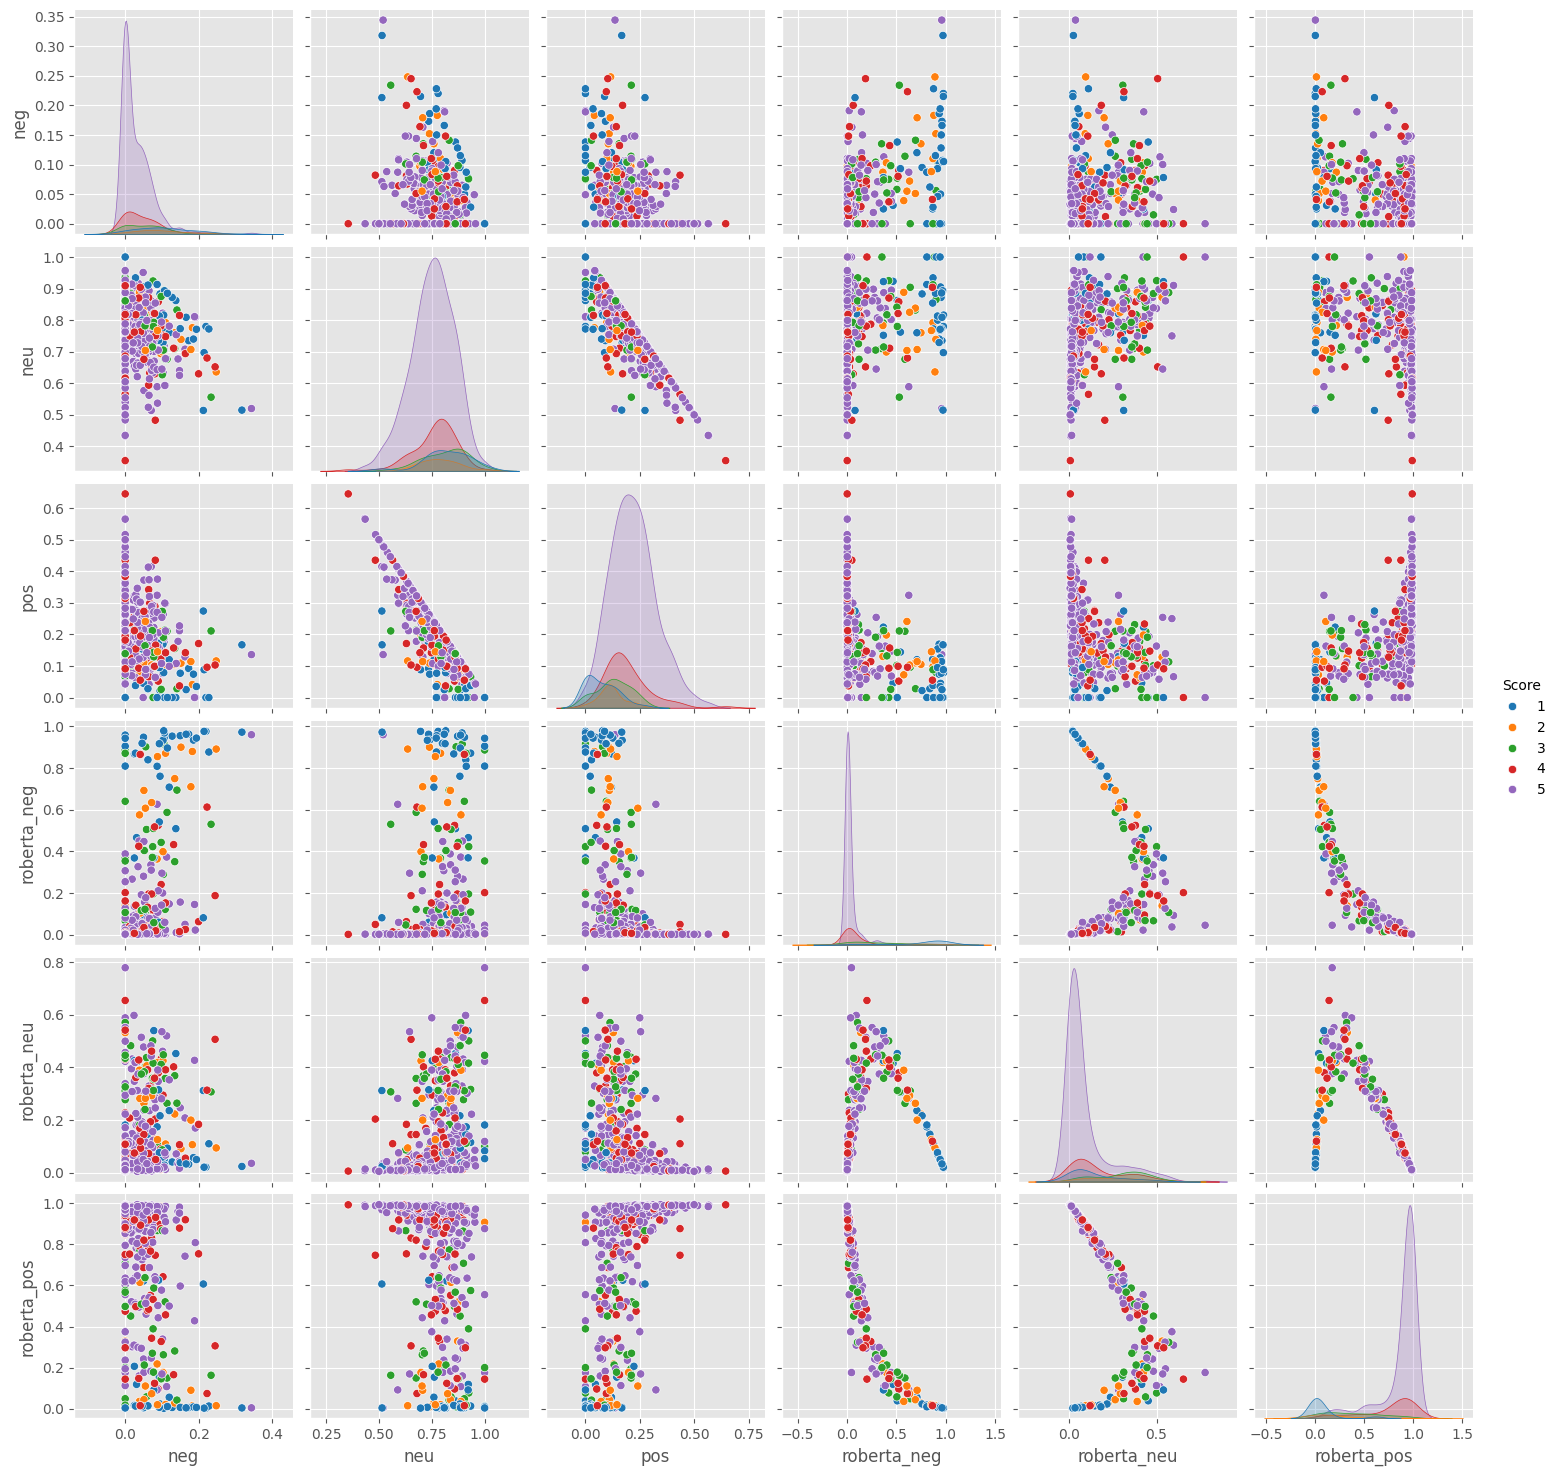

In [56]:
#using sesborn and ggplot
sns.pairplot(data=result_df,
             vars=['neg', 'neu', 'pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()#score 5 is purplish color

##Step 4 : Review Examples:

* Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most




In [57]:
#in Roberta
result_df.query('Score == 1')\
.sort_values('roberta_pos', ascending=False)['Text'].values[0]#print out the top value

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [58]:
#in VADER, actually its a negative sentiment not positive as machine read
result_df.query('Score == 1')\
.sort_values('pos', ascending=False)['Text'].values[0]#print out the top value

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [59]:
#Negative sentiment 5 star review
result_df.query('Score == 5')\
.sort_values('roberta_neg', ascending=False)['Text'].values[0]#print out the top value

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [62]:
result_df.query('Score == 5')\
.sort_values('neg', ascending=False)['Text'].values[0]#print out the top value

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

#Extra: The Transformer Pipeline


*   Quick & easy way to run sentiment predictions



In [64]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [65]:
#Test the pipeline
sentiment_pipeline('I am so happy')#its positive

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [66]:
sentiment_pipeline('I am so sad')#its negative

[{'label': 'NEGATIVE', 'score': 0.9993782043457031}]

In [67]:
sentiment_pipeline('boo')#its negative

[{'label': 'NEGATIVE', 'score': 0.9715901017189026}]

#The End